In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [22]:
data = pd.read_csv('daily_retail_price_Potato-upto_apr_2015.csv')
data.head()

,Date,Centre_Name,Commodity_Name,Price
0,25-11-97,DELHI,Potato,6.00
1,25-11-97,SHIMLA,Potato,6.00
2,25-11-97,LUCKNOW,Potato,6.00
3,25-11-97,AHMEDABAD,Potato,6.00
4,25-11-97,BHOPAL,Potato,5.75


In [23]:
data = data[data['Centre_Name']=='DELHI']
data.head()

,Date,Centre_Name,Commodity_Name,Price
0,25-11-97,DELHI,Potato,6.0
18,26-11-97,DELHI,Potato,6.0
36,27-11-97,DELHI,Potato,6.0
54,28-11-97,DELHI,Potato,6.0
72,01-12-97,DELHI,Potato,6.0


In [24]:
#Drop na's.
#Since the number of missing values are about 1%,taking an 'executive decision' of removing them.  
data.dropna(axis=0, inplace=True) #remove all rows with na's.
data.reset_index(drop=True)
data.sort_values('Price')[10:20]

,Date,Centre_Name,Commodity_Name,Price
10024,01-03-00,DELHI,Potato,3.5
10006,29-02-00,DELHI,Potato,3.5
10150,10-03-00,DELHI,Potato,3.5
9988,28-02-00,DELHI,Potato,3.5
9952,24-02-00,DELHI,Potato,3.5
9934,23-02-00,DELHI,Potato,3.5
9916,22-02-00,DELHI,Potato,3.5
9898,21-02-00,DELHI,Potato,3.5
9880,18-02-00,DELHI,Potato,3.5
9862,17-02-00,DELHI,Potato,3.5


In [25]:
#We use "Price" Column

data.columns = ["Date", "Centre_Name", "Commodity_Name", "Price"]
dataset = data.loc[:,["Price"]].values
dataset = dataset.astype("float32")
dataset.shape

(3774, 1)

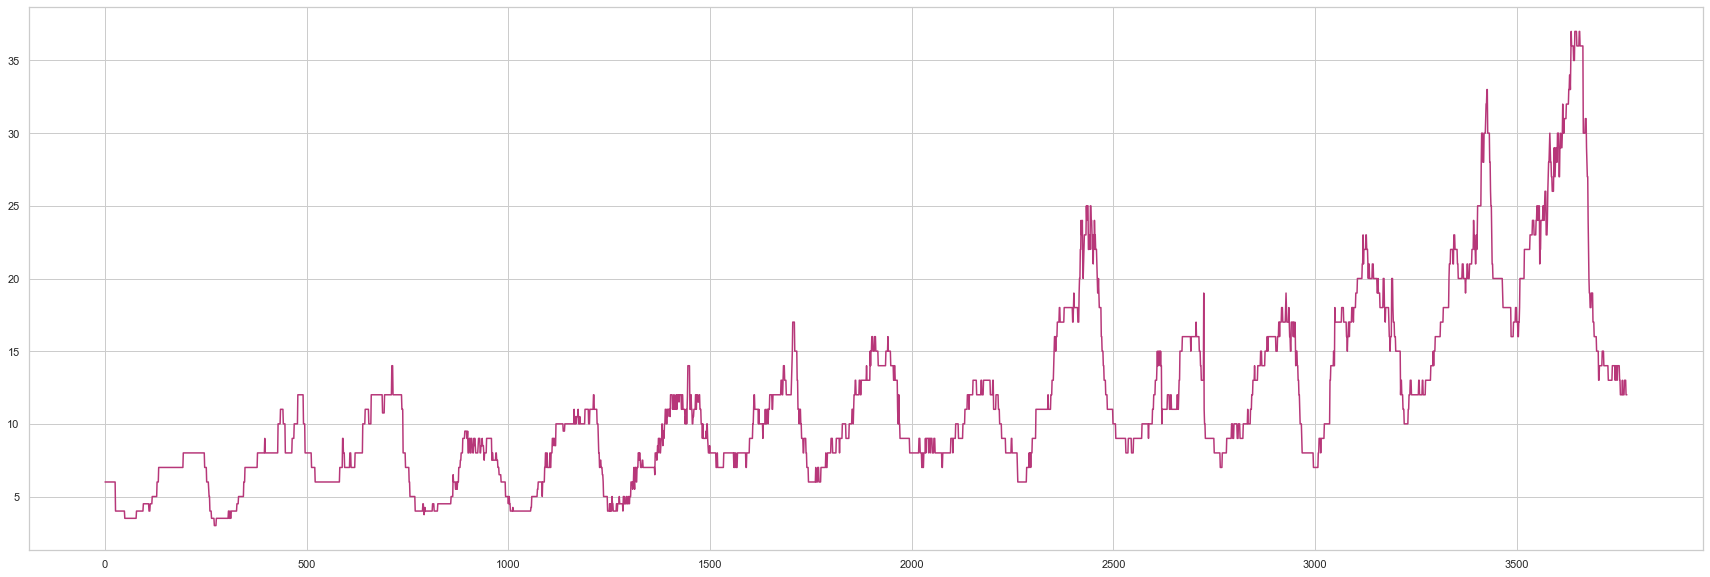

In [26]:
plt.figure(figsize=(30, 10))
sns.set(style="whitegrid")
sns.lineplot(data=dataset, palette="magma", linewidth=1.5, legend = False)
plt.show()

Scaling Dataset

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

Train - Test Split

Dataset was split by %50 as train and test.

In [28]:
#train-test split
train = dataset[:3019]
test=dataset[3019:]
print("train size: {}, test size: {}".format(len(train), len(test)))

train size: 3019, test size: 755


Creating a Data Structure with 10 Timesteps

In [29]:
#train:

time_step = 10
datax=[]
datay=[]

for i in range(len(train)-time_step-1):
    a=train[i:(i+time_step),0]
    datax.append(a)
    datay.append(train[i+time_step,0])
trainx=np.array(datax)
trainy=np.array(datay)

In [30]:
#test:

datax=[]
datay=[]

for i in range(len(test)-time_step-1):
    a=test[i:(i+time_step),0]
    datax.append(a)
    datay.append(test[i+time_step,0])
testx=np.array(datax)
testy=np.array(datay)

Rehsape the Datasets for Keras Format

In [31]:
trainx=np.reshape(trainx, (trainx.shape[0],1,trainx.shape[1]))
testx=np.reshape(testx, (testx.shape[0],1,testx.shape[1]))

Building a LSTM Model

In [32]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_step))) #10 LSTM neuron
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainx, trainy, epochs=100, batch_size=1)

Epoch 1/100
3008/3008 [==============================] - 4s 1ms/step - loss: 8.9418e-04
Epoch 2/100
3008/3008 [==============================] - 3s 1ms/step - loss: 3.7783e-04
Epoch 3/100
3008/3008 [==============================] - 3s 1ms/step - loss: 3.1060e-04
Epoch 4/100
3008/3008 [==============================] - 3s 1ms/step - loss: 2.9675e-04
Epoch 5/100
3008/3008 [==============================] - 3s 1ms/step - loss: 2.9013e-04
Epoch 6/100
3008/3008 [==============================] - 3s 1ms/step - loss: 2.7732e-04
Epoch 7/100
3008/3008 [==============================] - 3s 1ms/step - loss: 2.7057e-04
Epoch 8/100
3008/3008 [==============================] - 3s 1ms/step - loss: 2.6076e-04
Epoch 9/100
3008/3008 [==============================] - 3s 1ms/step - loss: 2.6160e-04
Epoch 10/100
3008/3008 [==============================] - 3s 1ms/step - loss: 2.5923e-04
Epoch 11/100
3008/3008 [==============================] - 3s 1ms/step - loss: 2.5749e-04
Epoch 12/100
3008/3008 [======

In [13]:
trainy = trainy.reshape(1,-1)
testy = testy.reshape(1,-1)

Prediction and Visualising LSTM Model

In [14]:
trainPredict = model.predict(trainx)
testPredict = model.predict(testx)
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform(trainy)
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform(testy)

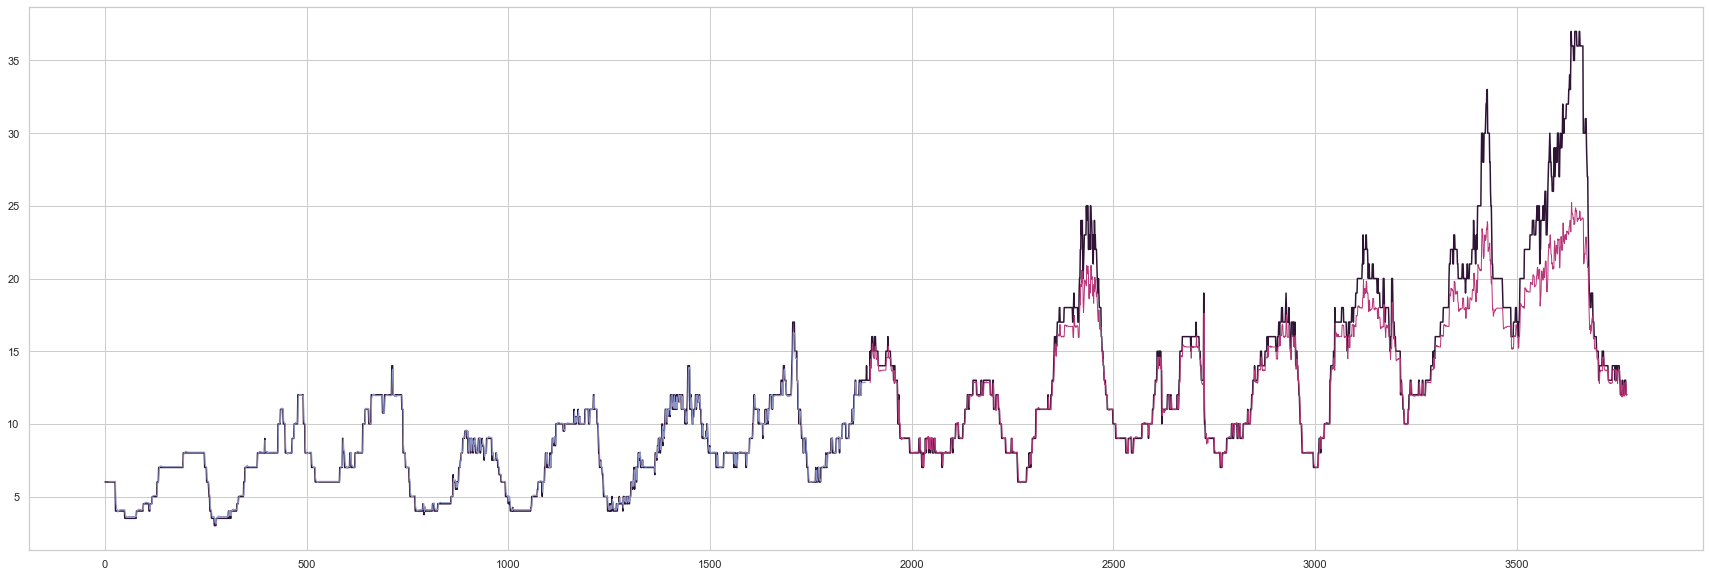

In [15]:
trainPredictPlot= np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[time_step:len(trainPredict)+time_step, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+(time_step*2)+1:len(dataset)-1,:]=testPredict

plt.figure(figsize=(30, 10))
sns.set(style="whitegrid")
sns.lineplot(data=scaler.inverse_transform(dataset), palette="twilight", linewidth=1.5, legend = False)
sns.lineplot(data=trainPredictPlot, palette="BuPu", linewidth=1.0, legend = False)
sns.lineplot(data=testPredictPlot, palette="magma", linewidth=1.0, legend = False)
plt.show()

Mean Squared Errors of Model

In [16]:
trainscore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
testscore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print("Train MSE: {}, Test MSE: {}".format(trainscore, testscore))

Train MSE: 0.4066833605557829, Test MSE: 2.63337742209245


In [35]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [39]:
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)